In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [0]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
#X will be numpy array of array and y is for labels(0 1 2)
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, 
                           centers=centers, cluster_std= 0.4)

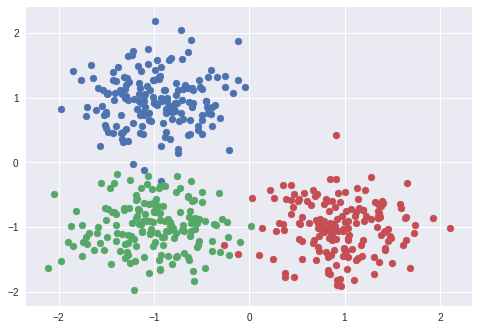

In [28]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [29]:
print(y)
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [0]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=10)

Epoch 1/10
500/500 [==============================] - 0s 228us/step - loss: 1.3283 - acc: 0.4480
Epoch 2/10
500/500 [==============================] - 0s 28us/step - loss: 0.3081 - acc: 0.9840
Epoch 3/10
500/500 [==============================] - 0s 23us/step - loss: 0.1361 - acc: 0.9880
Epoch 4/10
500/500 [==============================] - 0s 22us/step - loss: 0.0920 - acc: 0.9880
Epoch 5/10
500/500 [==============================] - 0s 25us/step - loss: 0.0767 - acc: 0.9860
Epoch 6/10
500/500 [==============================] - 0s 27us/step - loss: 0.0698 - acc: 0.9860
Epoch 7/10
500/500 [==============================] - 0s 31us/step - loss: 0.0649 - acc: 0.9880
Epoch 8/10
500/500 [==============================] - 0s 27us/step - loss: 0.0616 - acc: 0.9880
Epoch 9/10
500/500 [==============================] - 0s 43us/step - loss: 0.0587 - acc: 0.9880
Epoch 10/10
500/500 [==============================] - 0s 22us/step - loss: 0.0563 - acc: 0.9880


In [0]:
def plot_decision_boundary(X, y_cat, model):
  #equally space between the elements
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  print(xx_)
  print(yy_)
  grid = np.c_[xx_, yy_]
  pred_func = model.predict_classes(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

[-2.36524515 -2.26888013 -2.1725151  ...  2.16391117  2.2602762
  2.35664123]
[-2.22723031 -2.22723031 -2.22723031 ...  2.43345018  2.43345018
  2.43345018]


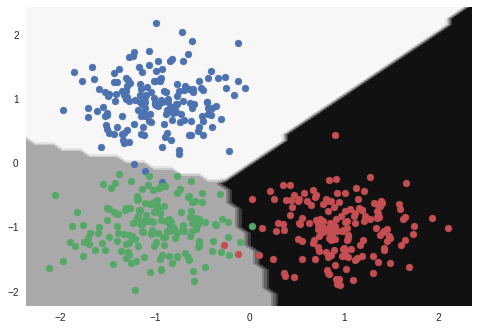

In [33]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

[-2.36524515 -2.26888013 -2.1725151  ...  2.16391117  2.2602762
  2.35664123]
[-2.22723031 -2.22723031 -2.22723031 ...  2.43345018  2.43345018
  2.43345018]
Prediction is [2]


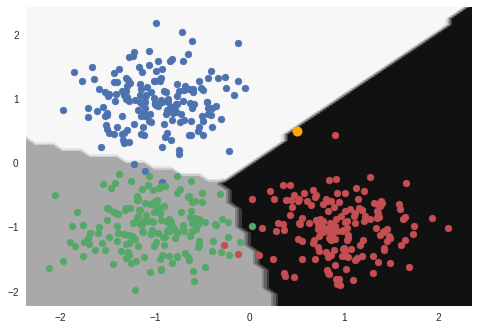

In [34]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x=0.5
y=0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='orange')
print("Prediction is", prediction)